In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union, Any
from __future__ import annotations

In [20]:
day_df = pd.read_csv("./day.csv")
hour_df = pd.read_csv("hour.csv")

In [31]:
hour_df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

# Data Exploration Notebook

Looking at different features of the bike rental data.

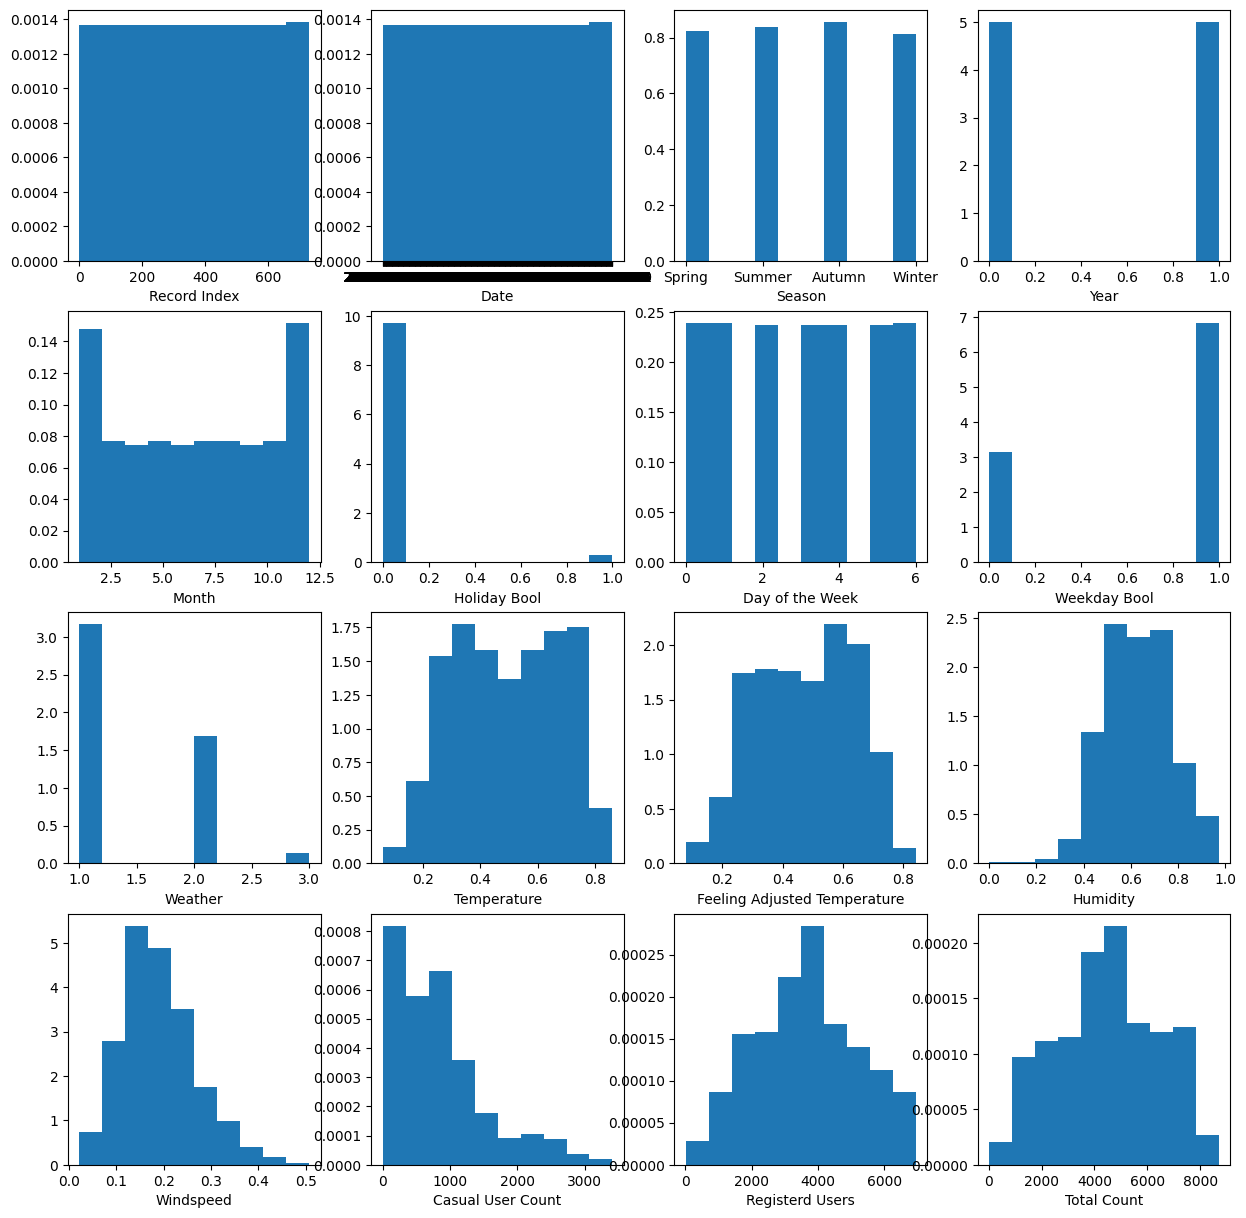

In [22]:
season_list = ["Spring", "Summer", "Autumn", "Winter"]
year_dict = {0: "2011", 1: "2012"}
x_label_dict = ["Record Index", "Date", "Season", "Year",
                "Month", "Holiday Bool", "Day of the Week", "Weekday Bool", "Weather", "Temperature", "Feeling Adjusted Temperature", "Humidity", "Windspeed", "Casual User Count", "Registerd Users",
                "Total Count"
                ]
fig, ax = plt.subplots(4,4, figsize=(15,15))
for i, feature in enumerate(day_df.columns.tolist()):
    ax[i//4 ,i%4].hist(day_df[feature], density=True)
    ax[i//4, i%4].set_xlabel(feature)
    ax[i//4, i%4].set_xlabel(x_label_dict[i])
ax[0, 2].set_xticks([i + 1 for i in range(4)], season_list);
ax[0, 1].set_xticks;

# Bike Hire Tasks Outlined
We have data from a bike hire scheme in washington, for days across two years. We are asked two questions about the dataset:
1. Does the bike hire data during peak hours across spring and summer, follow a normal distribution? To answer this question hypothesis testing is used.
2. Do the distributions of bike hire change between spring and summer?

These questions are clearly asked about a subset of the total data set. The data is only a member of summer spring, the peak times are clearly more important. Peak hours are quite ambiguous, and making the cutoff on my own without the team and visualisations is a bad idea. -Sean
## Structure of My Solution
Raw Data:
the data has a 15 ish features of which we are only interested in the total count during peak hours.
First step is to select only summer and spring:
```class BikeData
        def __init__():
            """
            load the data
            either from csv
            or already dataframe
            """
        def get_catagorical_subset(Feature and Catagories)

        def get_peak(hours, weekdays, holidays):
```
The output of the separated data will have the same hours for each day. Because there are not that many hours in the day we can just plot the histograms for each hour for bike usage and move on from there.


In [27]:
all_data = BikeData("hour.csv")

TypeError: argument of type 'NoneType' is not iterable